## Import required modules and load data file

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

ls = pd.read_csv('Dis2.csv')

In [2]:
ls.head()

,Y,PROFILE,PLAN,CHANGE,LANDUSE,ELEVATION,SLOPE,ASPECT,TWI,SPI,DRAINAGE,NDVI,RAINFALL,FAULTLINES,ROAD,GEOLOGY
0,1,38,43,2,10,11,22,7,45,24,36,16,29,32,88,18
1,1,57,52,2,10,26,31,11,30,23,12,22,29,28,88,10
2,1,57,52,2,10,26,31,11,45,30,17,36,29,28,88,10
3,1,38,43,2,10,26,6,7,16,23,17,22,29,28,88,10
4,1,38,43,2,10,26,31,15,45,30,17,36,29,28,88,10


## Correlation Heatmap

<IPython.core.display.Javascript object>


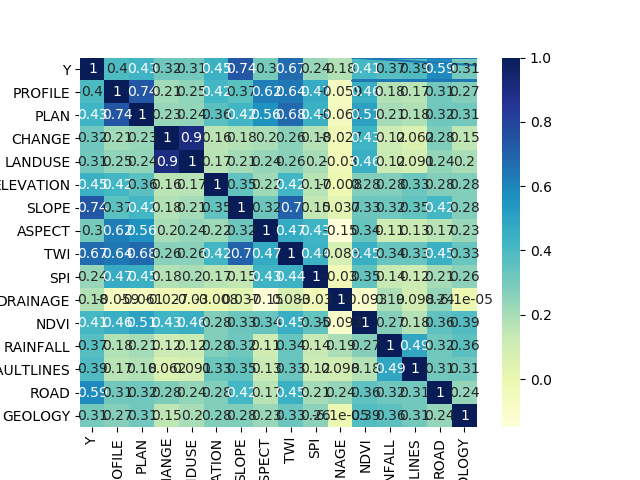

In [3]:
import seaborn as sns
sns.heatmap(ls.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Create train-test split

In [4]:
X = ls[['ELEVATION', 'SLOPE','ASPECT','TWI','SPI','NDVI','RAINFALL','LANDUSE']]
y = ls['Y']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Create classifier object

### K Nearest Neighbours

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_train, y_train)

print("Accuracy of KNN Classifier on test set: {:.2f}"
      .format(knn.score(X_test, y_test)))

#knn.predict_proba([[2,2,2,2,2,2,2,2,2,2]])

Accuracy of KNN Classifier on test set: 0.87


### Decission Trees

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

#dt.predict_proba([[2,2,2,2,2,2,2,2,2,2]])

Accuracy of Decision Tree classifier on test set: 0.86


### Kernalized Support Vector Machine

In [7]:
from sklearn.svm import SVC

# The default SVC kernel is radial basis function (RBF)
support_vc= SVC().fit(X_train, y_train)

print('Accuracy of Kernalized Support Vector Machine Classifier on test set: {:.2f}'
     .format(support_vc.score(X_test, y_test)))


Accuracy of Kernalized Support Vector Machine Classifier on test set: 0.68


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

print('Accuracy of Linear Regression on test set: {:.2f}'
     .format(linreg.score(X_test, y_test)))


Accuracy of Linear Regression on test set: 0.64


### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, random_state=0)

rf.fit(X_train, y_train)

print('Accuracy of Random Forest on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

#rf.predict_proba([[2,2,2,2,2,2,2,2,2,2]])

Accuracy of Random Forest on test set: 0.88


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Bayesian Regression

In [10]:
from sklearn import linear_model

br = linear_model.BayesianRidge()

br.fit(X_train, y_train)

print('Accuracy of Bayesian Regression on test set: {:.2f}'
     .format(br.score(X_test, y_test)))

Accuracy of Bayesian Regression on test set: 0.64


### AdaBoost

In [11]:
from sklearn.ensemble import AdaBoostClassifier

aBoost = AdaBoostClassifier(n_estimators=100)

aBoost.fit(X_train, y_train)

print('Accuracy of AdaBoost Classifier on test set: {:.2f}'
     .format(br.score(X_test, y_test)))

Accuracy of AdaBoost Classifier on test set: 0.64


### Gradient Tree Boosting

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

print('Accuracy of Gradient Tree Boosting Classifier on test set: {:.2f}'
     .format(br.score(X_test, y_test)))

Accuracy of Gradient Tree Boosting Classifier on test set: 0.64


### Neural Network

In [13]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

nn.fit(X_train, y_train)

print('Accuracy of Neural Network Classifier on test set: {:.2f}'
     .format(br.score(X_test, y_test)))

Accuracy of Neural Network Classifier on test set: 0.64


In [14]:
rf.get_params(deep=True)

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [15]:
import pickle

In [16]:
pickle.dump(rf,open("model.pkl",'wb'))

In [17]:
plt.plot(ls['ELEVATION'],ls['Y'])
plt.show()

In [18]:
inputs = ls.drop(['PROFILE', 'PLAN', 'CHANGE', 'DRAINAGE', 'FAULTLINES', 'ROAD', 'GEOLOGY'],axis='columns')
inputs.head()

,Y,LANDUSE,ELEVATION,SLOPE,ASPECT,TWI,SPI,NDVI,RAINFALL
0,1,10,11,22,7,45,24,16,29
1,1,10,26,31,11,30,23,22,29
2,1,10,26,31,11,45,30,36,29
3,1,10,26,6,7,16,23,22,29
4,1,10,26,31,15,45,30,36,29


<IPython.core.display.Javascript object>


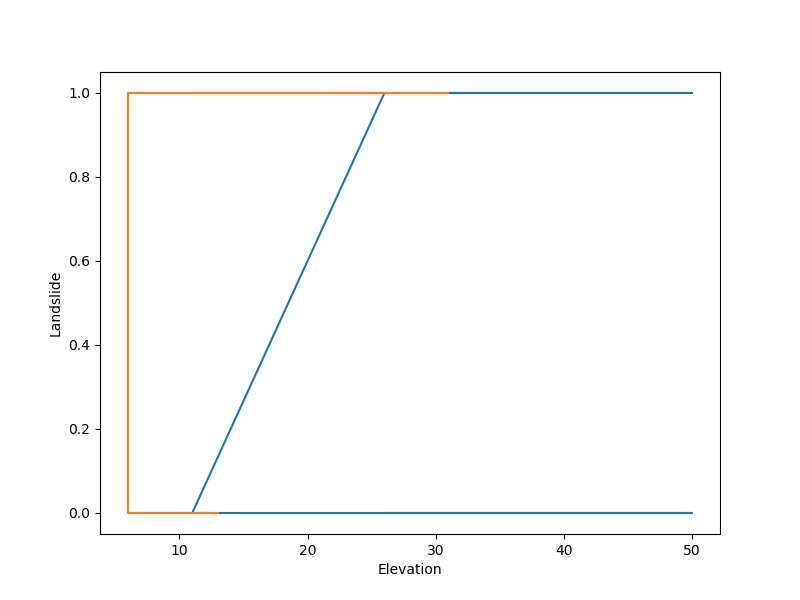

In [19]:
plt.figure(figsize=(8,6))
#plt.title("Air Quality")
plt.xlabel("Elevation")
plt.ylabel("Landslide")
plt.plot(ls.ELEVATION,ls.Y)
plt.plot(ls.SLOPE,ls.Y)
#plt.plot(sample_data.time,sample_data.dust,'o')
#plt.plot(sample_data.time,sample_data.temperature)
#plt.plot(sample_data.time,sample_data.humidity)
#plt.legend(["MQ135", "MQ7", "Dust", "Temperature", "Humidity"])
plt.show()

<IPython.core.display.Javascript object>


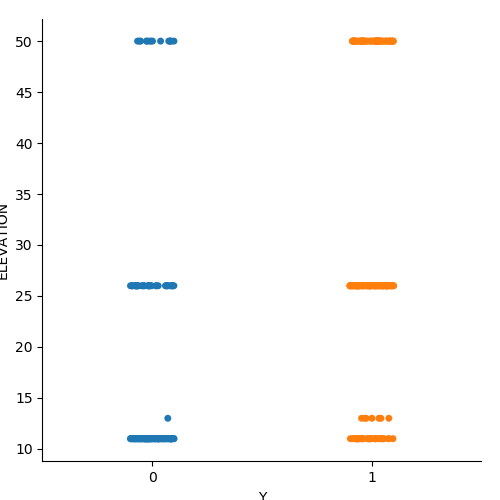

<IPython.core.display.Javascript object>


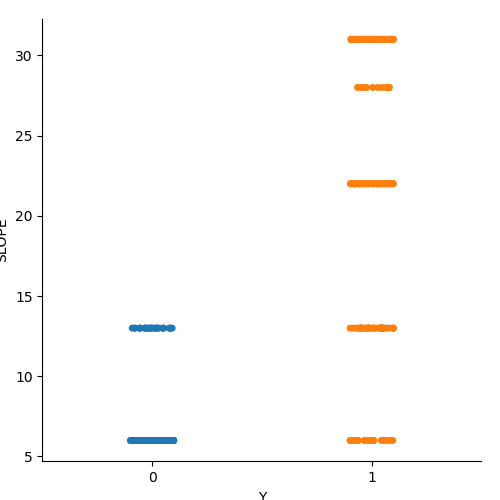

<IPython.core.display.Javascript object>


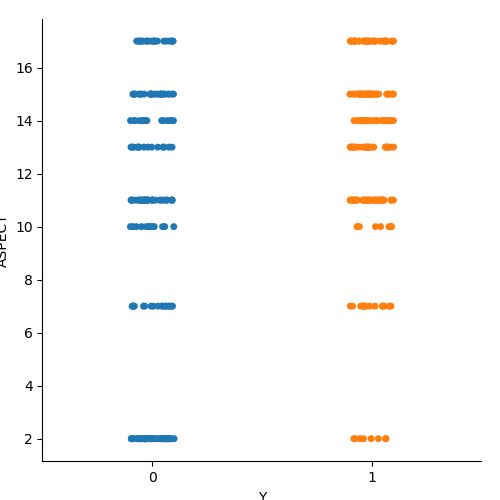

<IPython.core.display.Javascript object>


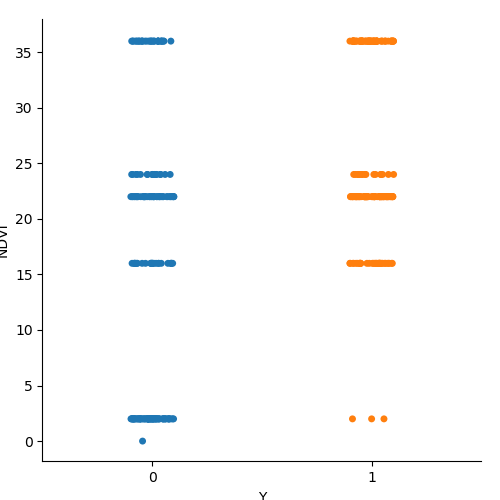

<IPython.core.display.Javascript object>


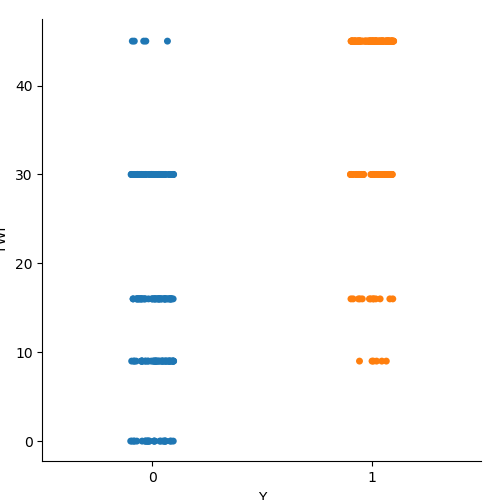

<IPython.core.display.Javascript object>


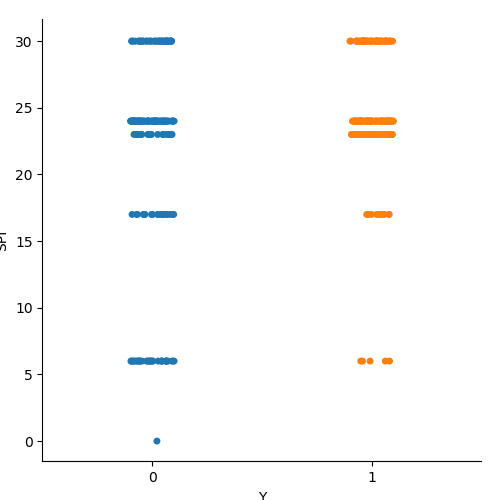

<IPython.core.display.Javascript object>


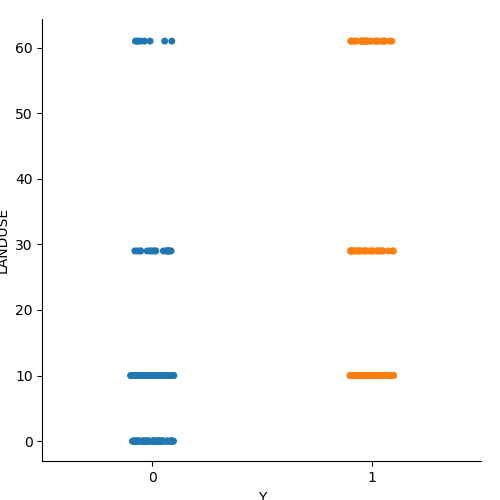

<IPython.core.display.Javascript object>


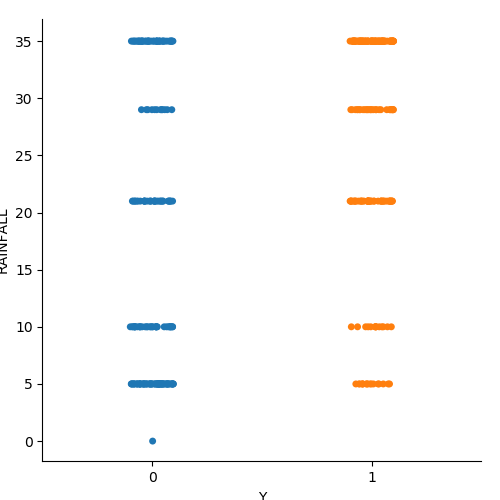

In [20]:
sns.catplot(x="Y", y="ELEVATION", data=ls)
sns.catplot(x="Y", y="SLOPE", data=ls)
sns.catplot(x="Y", y="ASPECT", data=ls)
sns.catplot(x="Y", y="NDVI", data=ls)
sns.catplot(x="Y", y="TWI", data=ls)
sns.catplot(x="Y", y="SPI", data=ls)
sns.catplot(x="Y", y="LANDUSE", data=ls)
sns.catplot(x="Y", y="RAINFALL", data=ls)

In [1]:
sns.catplot(x="ELEVATION", y="SLOPE",col="Y", kind="bar",hue="RAINFALL", data=ls)
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)

NameError: name 'sns' is not defined

<IPython.core.display.Javascript object>


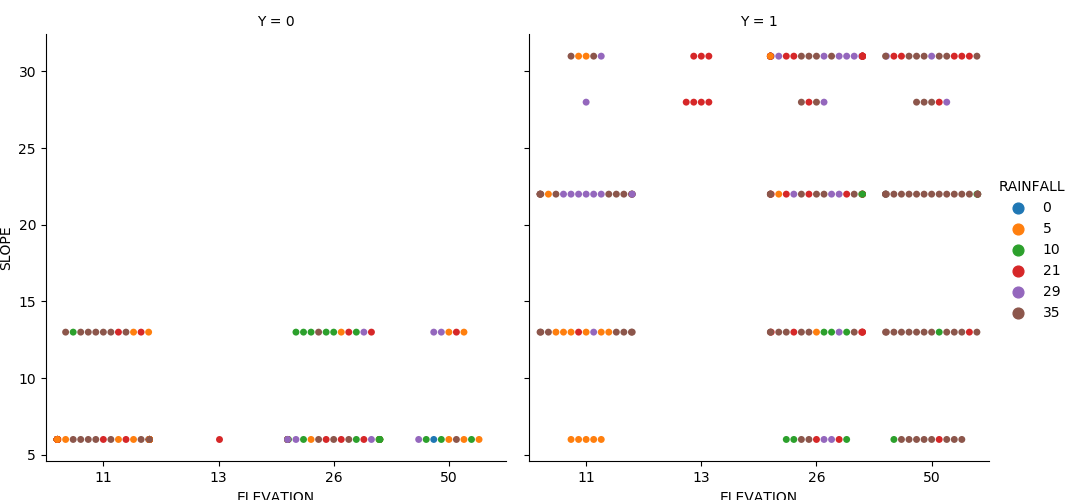

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.6% of the points

In [22]:
sns.catplot(x="ELEVATION", y="SLOPE", hue="RAINFALL",
            col="Y",
            kind="swarm", data=ls)

<IPython.core.display.Javascript object>


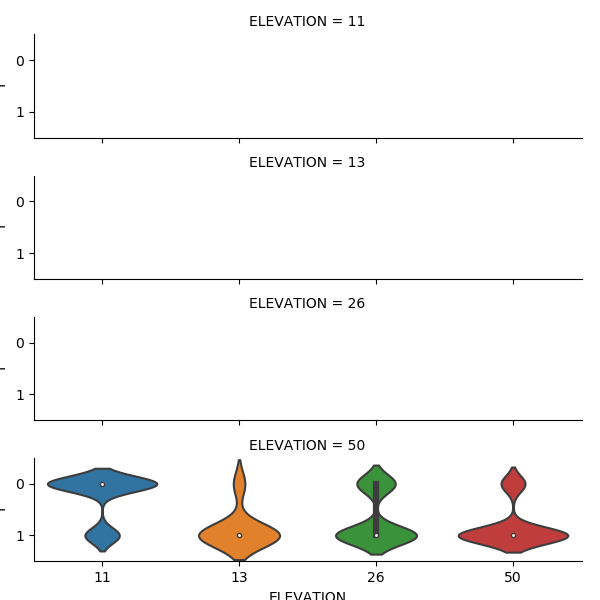

In [23]:
sns.catplot(x="SLOPE", y="Y", row="ELEVATION",
                kind="box", orient="h", height=1.5, aspect=4,
                data=ls.query("SLOPE > 0"))

In [24]:
sns.violinplot(x=ls.ELEVATION, y=ls.Y)

<IPython.core.display.Javascript object>


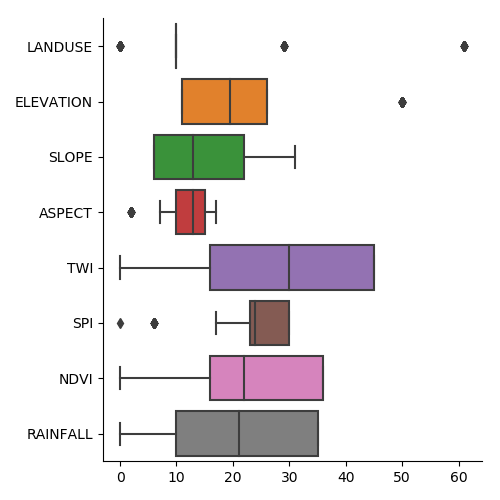

In [25]:
input1 = inputs.drop(["Y"],axis= "columns")
sns.catplot(data= input1, orient="h", kind="box")

<IPython.core.display.Javascript object>


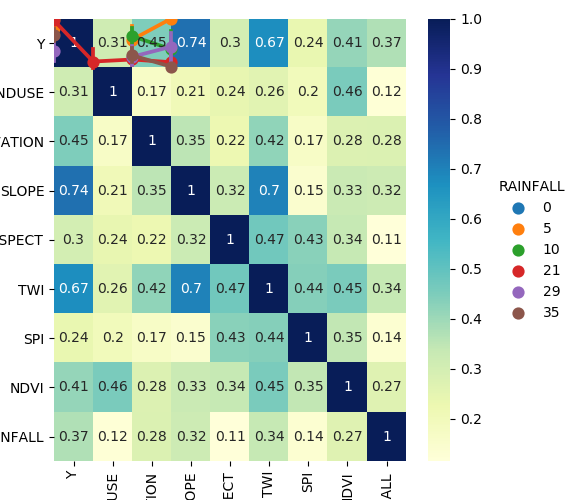

In [26]:
sns.catplot(x="ELEVATION", y="Y", hue="RAINFALL", kind="point", data=inputs)

In [27]:
sns.heatmap(inputs.corr(), annot=True, cmap="YlGnBu")

<IPython.core.display.Javascript object>


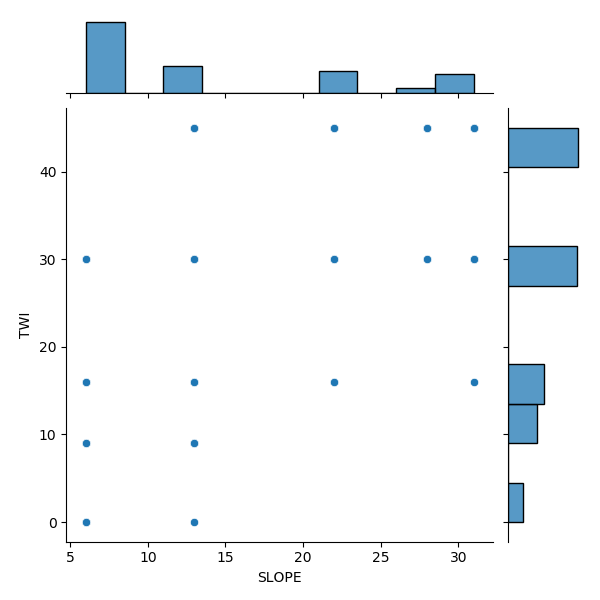

In [28]:
sns.jointplot(data=inputs, x="SLOPE", y="TWI")

<IPython.core.display.Javascript object>


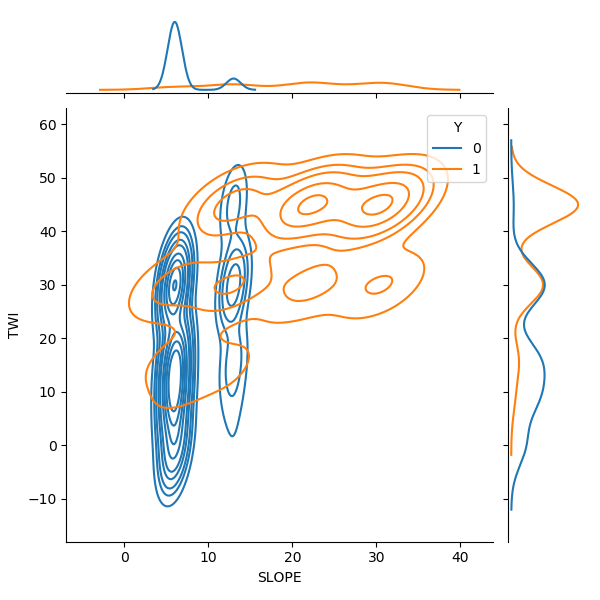

In [29]:
sns.jointplot(
    data=inputs,
    x="SLOPE", y="TWI", hue="Y",
    kind="kde"
)

<IPython.core.display.Javascript object>


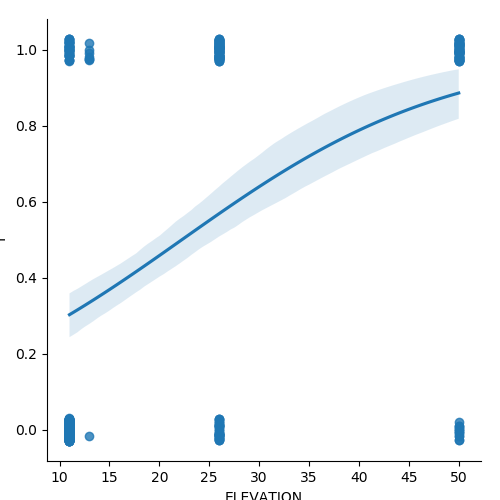

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [30]:
sns.lmplot(x="ELEVATION", y="Y", data=inputs,
           logistic=True, y_jitter=.03);